In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import RFE,SelectFromModel
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
a=pd.read_csv('bank-full.csv', sep=";")
a

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
a.shape

(45211, 17)

In [5]:
a[a.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [6]:
a.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: xlabel='y', ylabel='count'>

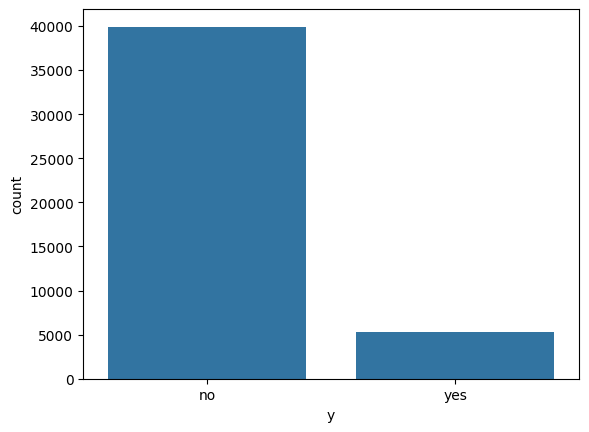

In [8]:
sns.countplot(x="y",data=a)

In [12]:
data1=a[a["y"] == "yes"]
data2=a[a["y"] == "no"]

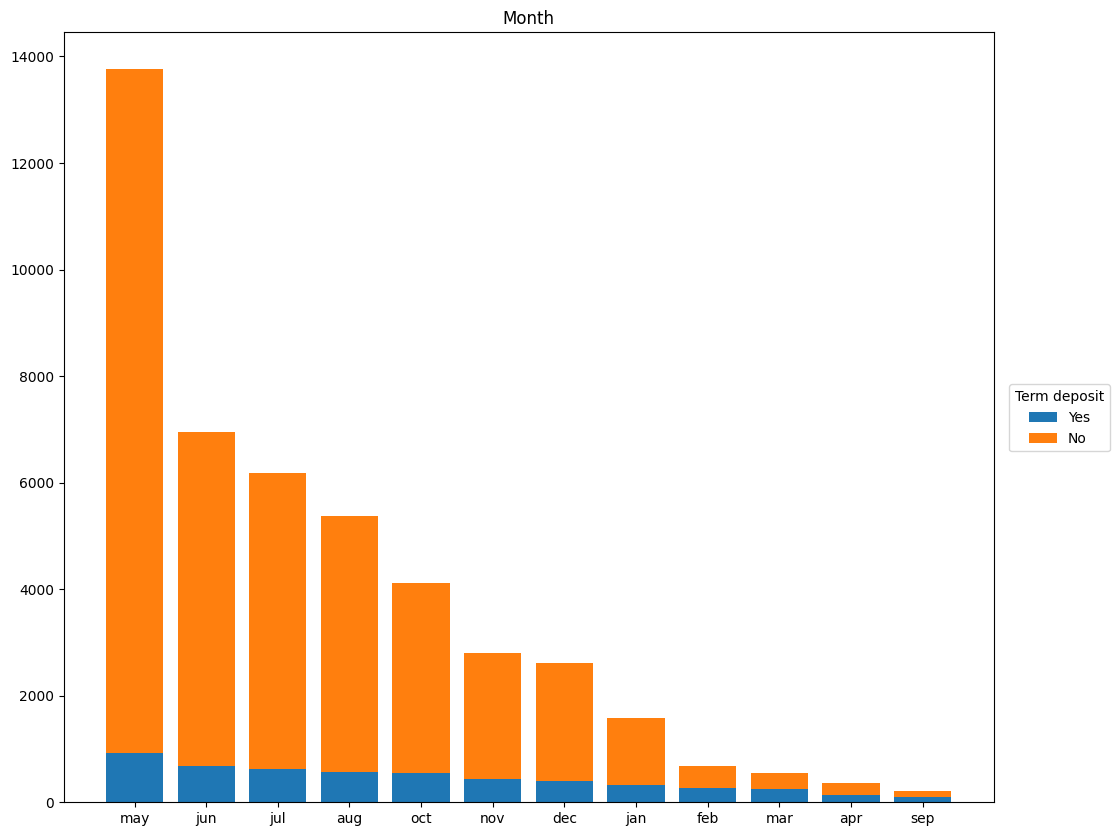

In [14]:
fig,ax=plt.subplots(figsize=(12,10))
ax.bar(data1["month"].unique(),height=data1["month"].value_counts())
ax.bar(data2["month"].unique(),height=data2["month"].value_counts(),bottom=data1["month"].value_counts())
ax.title.set_text("Month")
plt.figlegend( ('Yes','No'), loc="right", title="Term deposit")
plt.show()

In [15]:
a["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [16]:
x=a.iloc[:,0:16]
y=a.iloc[:,16]

In [17]:
x=pd.get_dummies(x)
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [19]:
classifier=LogisticRegression(random_state=0,multi_class="auto",max_iter=3000)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [20]:
y_predict=classifier.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_predict)
print(confusion_matrix)

[[7800  194]
 [ 712  337]]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

print("Accuracy Score:", accuracy_score(y_test,y_predict))
print("Model Score", classifier.score(x_test,y_test))

Accuracy Score: 0.8998120092889528
Model Score 0.8998120092889528


In [24]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7994
         yes       0.63      0.32      0.43      1049

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [25]:
from sklearn.preprocessing import label_binarize

y_test=label_binarize(y_test,classes=['no','yes'])
y_predict=label_binarize(y_predict,classes=['no','yes'])

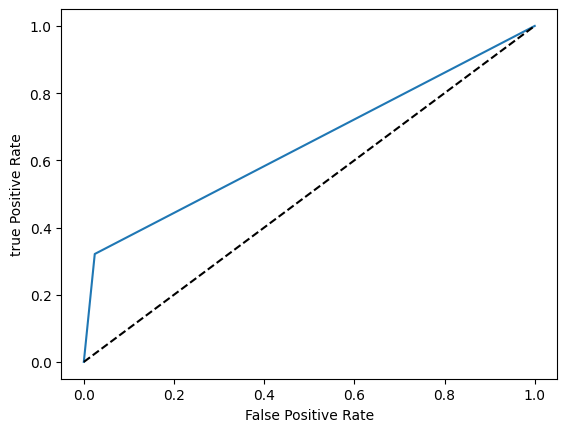

auc 0.648495


In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

pre=classifier.predict(x)
fpr, tpr, thresholds=roc_curve(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)

plt.plot(fpr, tpr, label='Logistic regression (area= %0.3f)')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('true Positive Rate')

plt.show()
print('auc', np.round(auc,6))